In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('basefees.csv').head(100000)

In [2]:
df=pd.read_csv('ethereumfee.csv')

In [3]:
df['gas_pct_used'] = df['gas_used'] / df['gas_limit']


In [4]:
df.describe()

,number,gas_limit,gas_used,size,base_fee_per_gas,gas_pct_used
count,3.280200e+05,3.280200e+05,3.280200e+05,3.280200e+05,3.280200e+05,328020.000000
mean,2.233434e+07,3.596577e+07,1.823859e+07,8.833728e+04,1.663940e+09,0.507111
std,9.469136e+04,5.281902e+04,8.643635e+06,5.541746e+04,3.585127e+09,0.240338
min,2.217034e+07,3.523384e+07,0.000000e+00,1.168000e+03,2.460368e+08,0.000000
25%,2.225234e+07,3.596457e+07,1.233789e+07,5.792375e+04,4.000077e+08,0.343039
50%,2.233434e+07,3.599986e+07,1.688718e+07,7.922850e+04,5.519128e+08,0.469545
75%,2.241635e+07,3.600000e+07,2.320265e+07,1.064992e+05,1.466726e+09,0.645086
max,2.249835e+07,3.610557e+07,3.610050e+07,1.915661e+06,1.273805e+11,1.000000


In [21]:
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data for AR(1) model
gas_used_series = df['gas_used']

# Fit the AR(1) model
model = AutoReg(gas_used_series, lags=12)
model_fit = model.fit()

# Extract the AR(1) coefficient
ar1_coefficient = model_fit.params[1]
ar1_coefficient



/var/folders/n8/fg13rkv5657f2xncnz3kq_jc0000gn/T/ipykernel_21737/1514869586.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ar1_coefficient = model_fit.params[1]


np.float64(-0.33098941194032566)

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               gas_used   No. Observations:               328020
Model:                    AutoReg(12)   Log Likelihood            -5686253.779
Method:               Conditional MLE   S.D. of innovations        8176528.366
Date:                Fri, 16 May 2025   AIC                       11372535.557
Time:                        21:59:42   BIC                       11372685.368
Sample:                            12   HQIC                      11372578.724
                               328020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.341e+07   1.83e+05    183.025      0.000     3.3e+07    3.38e+07
gas_used.L1     -0.3310      0.002   -189.566      0.000      -0.334      -0.328
gas_used.L2     -0.1938      0.002   -105.361      0.000      -0.197      -0.190
gas_used.L3     -0.1182      0.002    -63.209      0.000      -0.122      -0.115
gas_used.L4     -0.0749      0.002    -39.830      0.000      -0.079      -0.071
gas_used.L5     -0.0444      0.002    -23.544      0.000      -0.048      -0.041
gas_used.L6     -0.0294      0.002    -15.601      0.000      -0.033      -0.026
gas_used.L7     -0.0178      0.002     -9.453      0.000      -0.022      -0.014
gas_used.L8     -0.0114      0.002     -6.062      0.000      -0.015      -0.008
gas_used.L9     -0.0102      0.002     -5.397      0.000      -0.014      -0.006
gas_used.L10    -0.0030      0.002     -1.591      0.112      -0.007       0.001
gas_used.L11    -0.0014      0.002     -0.737      0.461      -0.005       0.002
gas_used.L12     0.0039      0.002      2.234      0.025       0.000       0.007
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.5117           -0.0000j            1.5117           -0.5000
AR.2            -1.3115           -0.7814j            1.5267           -0.4145
AR.3            -1.3115           +0.7814j            1.5267            0.4145
AR.4            -0.8055           -1.3548j            1.5762           -0.3354
AR.5            -0.8055           +1.3548j            1.5762            0.3354
AR.6            -0.0701           -1.5497j            1.5513           -0.2572
AR.7            -0.0701           +1.5497j            1.5513            0.2572
AR.8             0.7033           -1.3517j            1.5237           -0.1736
AR.9             0.7033           +1.3517j            1.5237            0.1736
AR.10            1.3135           -0.8112j            1.5438           -0.0881
AR.11            1.3135           +0.8112j            1.5438            0.0881
AR.12            2.1997           -0.0000j            2.1997           -0.0000
------------------------------------------------------------------------------
"""

In [10]:
import statsmodels.api as sm

# Prepare the data for manual AR(1) estimation
gas_used_series = df['gas_used'].values

# Create lagged version of the series
lagged_gas_used = np.roll(gas_used_series, 1)
lagged_gas_used[0] = 0  # Set the first element to 0 as it has no lagged value

# Add a constant term for the intercept
X = sm.add_constant(lagged_gas_used)

# Fit the linear regression model
model = sm.OLS(gas_used_series, X).fit()

# Extract the AR(1) coefficient
manual_ar1_coefficient = model.params[1]
manual_ar1_coefficient


np.float64(-0.26901685860070534)

In [7]:
df.count()

time                328020
number              328020
gas_limit           328020
gas_used            328020
size                328020
base_fee_per_gas    328020
gas_pct_used        328020
dtype: int64

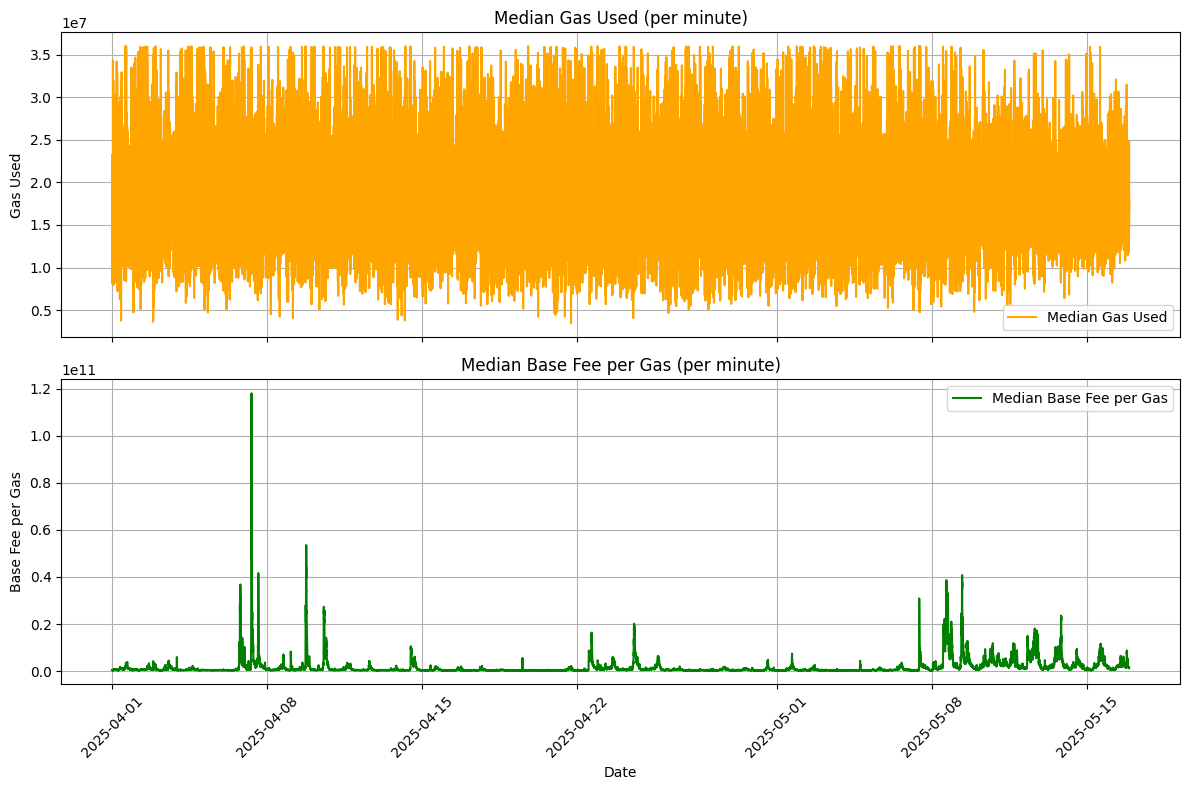

In [11]:
# Resample data to minute frequency and calculate median values
df['time'] = pd.to_datetime(df['time'])
df_indexed = df.set_index('time')

# Resample to minute frequency for median values
minute_data = df_indexed.resample('min').agg({
    'gas_used': 'median',
    'base_fee_per_gas': 'median'
})

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot median gas used
axs[0].plot(minute_data.index, minute_data['gas_used'], color='orange', label='Median Gas Used')
axs[0].set_ylabel('Gas Used')
axs[0].set_title('Median Gas Used (per minute)')
axs[0].legend()
axs[0].grid(True)

# Plot median base fee per gas
axs[1].plot(minute_data.index, minute_data['base_fee_per_gas'], color='green', label='Median Base Fee per Gas')
axs[1].set_ylabel('Base Fee per Gas')
axs[1].set_title('Median Base Fee per Gas (per minute)')
axs[1].legend()
axs[1].grid(True)

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
df

,time,number,gas_limit,gas_used,size,base_fee_per_gas,gas_pct_used
0,2025-04-01 00:00:11+00:00,22170335,36000000,31451564,206444,459787182,0.873655
1,2025-04-01 00:00:23+00:00,22170336,35964845,25464695,92566,502737575,0.708044
2,2025-04-01 00:00:35+00:00,22170337,35929725,14846580,61881,528885469,0.413212
3,2025-04-01 00:00:47+00:00,22170338,35964811,13819768,64565,517410193,0.384258
4,2025-04-01 00:00:59+00:00,22170339,35929691,18786273,87289,502438678,0.522862
...,...,...,...,...,...,...,...
328015,2025-05-16 21:38:35+00:00,22498350,35999897,18594420,79986,1417357639,0.516513
328016,2025-05-16 21:38:47+00:00,22498351,36000000,24141569,124267,1423208901,0.670599
328017,2025-05-16 21:38:59+00:00,22498352,36035155,9486008,50361,1483908454,0.263243
328018,2025-05-16 21:39:11+00:00,22498353,36000000,20550903,94126,1396077087,0.570858


In [13]:
df.describe()

,number,gas_limit,gas_used,size,base_fee_per_gas,gas_pct_used
count,3.280200e+05,3.280200e+05,3.280200e+05,3.280200e+05,3.280200e+05,328020.000000
mean,2.233434e+07,3.596577e+07,1.823859e+07,8.833728e+04,1.663940e+09,0.507111
std,9.469136e+04,5.281902e+04,8.643635e+06,5.541746e+04,3.585127e+09,0.240338
min,2.217034e+07,3.523384e+07,0.000000e+00,1.168000e+03,2.460368e+08,0.000000
25%,2.225234e+07,3.596457e+07,1.233789e+07,5.792375e+04,4.000077e+08,0.343039
50%,2.233434e+07,3.599986e+07,1.688718e+07,7.922850e+04,5.519128e+08,0.469545
75%,2.241635e+07,3.600000e+07,2.320265e+07,1.064992e+05,1.466726e+09,0.645086
max,2.249835e+07,3.610557e+07,3.610050e+07,1.915661e+06,1.273805e+11,1.000000


In [14]:
import numpy as np
import statsmodels.api as sm

# Model gas_used as an AR(1) process
gas_used = df['gas_used'].astype(float).values

# Remove mean for AR(1) estimation
gas_used_mean = np.mean(gas_used)
gas_used_centered = gas_used - gas_used_mean

# Fit AR(1) model
ar1_model = sm.tsa.ARIMA(gas_used_centered, order=(1,0,0))
ar1_result = ar1_model.fit()

# Extract AR(1) coefficient (use integer index, not string)
ar1_coefficient = ar1_result.params[1]  # params[0] is the constant, params[1] is AR1

# Estimate mean and standard deviation of the process
estimated_mean = gas_used_mean
estimated_std = np.std(gas_used, ddof=1)

print("AR(1) coefficient:", ar1_coefficient)
print("Estimated mean:", estimated_mean)
print("Estimated standard deviation:", estimated_std)



AR(1) coefficient: -0.26901067676211743
Estimated mean: 18238590.077644657
Estimated standard deviation: 8643634.89731887


In [58]:
(df.gas_used / 6).to_csv('gas_used_basediv6_sim.csv', index=False, header=True)

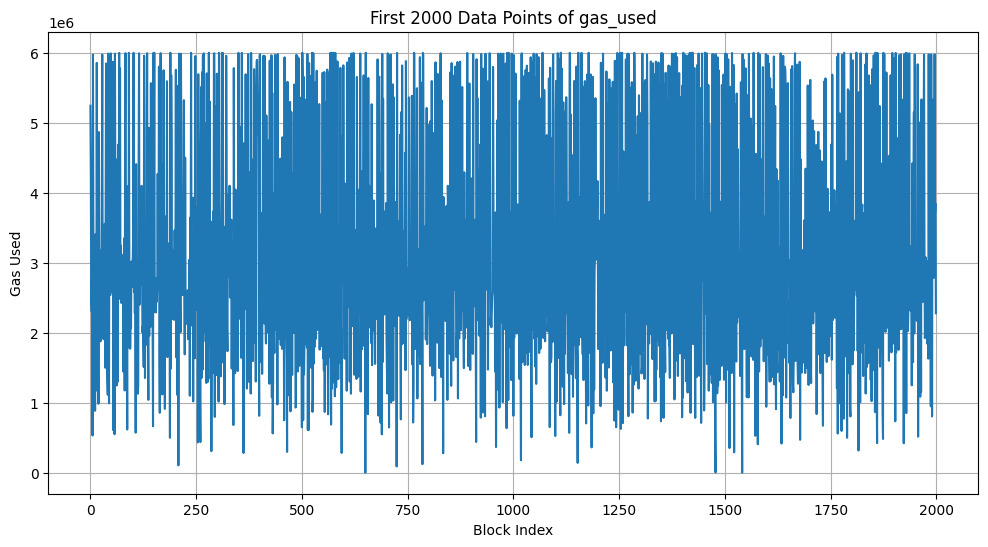

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['gas_used'].iloc[:2000]/6)
plt.title('First 2000 Data Points of gas_used')
plt.xlabel('Block Index')
plt.ylabel('Gas Used')
plt.grid(True)
plt.show()


In [84]:
df.base_fee_per_gas.describe()

count    1.939681e+06
mean     1.711007e+06
std      1.588541e+06
min      3.140000e+02
25%      9.592220e+05
50%      1.207830e+06
75%      1.615364e+06
max      2.488069e+07
Name: base_fee_per_gas, dtype: float64

In [16]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Prepare data
rolling_quantile = df.gas_pct_used.rolling(window=20).quantile(0.10)

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.07,
                    subplot_titles=("Base Fee Per Gas", "Rolling 10th Quantile of Gas % Used"))

# First subplot: base_fee_per_gas
fig.add_trace(
    go.Scatter(
        x=df.index, y=df.base_fee_per_gas,
        mode='lines', name='base_fee_per_gas',
        line=dict(color='royalblue')
    ),
    row=1, col=1
)

# Second subplot: rolling 10th quantile of gas_pct_used
fig.add_trace(
    go.Scatter(
        x=df.index, y=rolling_quantile,
        mode='lines', name='Rolling 10th Quantile (window=20)',
        line=dict(color='seagreen')
    ),
    row=2, col=1
)

# Add vertical tracer (spikelines) tied to mouse
fig.update_layout(
    height=800, width=1200,
    hovermode='x unified',
    xaxis=dict(showspikes=True, spikemode='across', spikesnap='cursor', showline=True),
    xaxis2=dict(showspikes=True, spikemode='across', spikesnap='cursor', showline=True),
    spikedistance=-1,
    title_text="Base Fee Per Gas and Rolling 10th Quantile of Gas % Used"
)

fig.update_xaxes(showspikes=True, spikemode='across', spikesnap='cursor', spikethickness=2)
fig.update_yaxes(showspikes=True, spikemode='across', spikesnap='cursor', spikethickness=2)

fig.show()

ModuleNotFoundError: No module named 'plotly'

<Axes: >

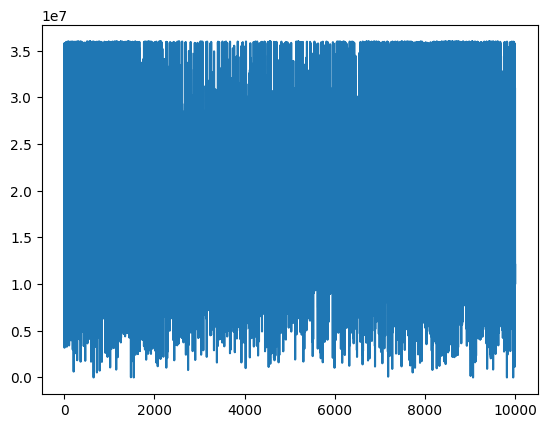

In [17]:
df.gas_used.head(10000).plot()

In [68]:
import statsmodels.api as sm
import numpy as np

# Center the base_fee_per_gas series
base_fee_mean = df['base_fee_per_gas'].mean()
base_fee_centered = df['base_fee_per_gas'] - base_fee_mean

# Fit AR(1) model
ar1_model_fee = sm.tsa.ARIMA(base_fee_centered, order=(1,0,0))
ar1_result_fee = ar1_model_fee.fit()

# Extract coefficients
const = ar1_result_fee.params[0]
ar1_coeff = ar1_result_fee.params[1]

print("AR(1) model for base_fee_per_gas:")
print(f"Constant (c): {const}")
print(f"AR(1) coefficient (phi): {ar1_coeff}")

print("\nEquation representation:")
print(f"base_fee_per_gas_t = {base_fee_mean:.4f} + ({const:.4f}) + ({ar1_coeff:.4f}) * (base_fee_per_gas_(t-1) - {base_fee_mean:.4f}) + error_t")


AR(1) model for base_fee_per_gas:
Constant (c): -9.507816756126886e-11
AR(1) coefficient (phi): 0.9999950943947948

Equation representation:
base_fee_per_gas_t = 1451236.5617 + (-0.0000) + (1.0000) * (base_fee_per_gas_(t-1) - 1451236.5617) + error_t


/var/folders/n8/fg13rkv5657f2xncnz3kq_jc0000gn/T/ipykernel_83300/3844698784.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  const = ar1_result_fee.params[0]
/var/folders/n8/fg13rkv5657f2xncnz3kq_jc0000gn/T/ipykernel_83300/3844698784.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ar1_coeff = ar1_result_fee.params[1]


In [18]:
# Calculate percentage change (log-differences) for gas_used and base_fee_per_gas
df['log_gas_used'] = np.log(df['gas_used'])
df['log_base_fee'] = np.log(df['base_fee_per_gas'])

df['dlog_gas_used'] = df['log_gas_used'].diff()
df['dlog_base_fee'] = df['log_base_fee'].diff()

# Drop missing values from differencing
elasticity_df = df[['dlog_gas_used', 'dlog_base_fee']].dropna()

# Regress dlog_gas_used on dlog_base_fee (no constant, as we are interested in elasticity)
import statsmodels.api as sm

X = elasticity_df['dlog_base_fee']
X = sm.add_constant(X)  # Add constant if you want intercept; elasticity is the slope
y = elasticity_df['dlog_gas_used']

model = sm.OLS(y, X)
result = model.fit()

elasticity = result.params['dlog_base_fee']
print(f"Estimated price elasticity of demand for gas_used: {elasticity:.4f}")
print(result.summary())


Estimated price elasticity of demand for gas_used: nan
                            OLS Regression Results                            
Dep. Variable:          dlog_gas_used   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 16 May 2025   Prob (F-statistic):                nan
Time:                        21:56:13   Log-Likelihood:                    nan
No. Observations:              328019   AIC:                               nan
Df Residuals:                  328017   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/gordon.liao/GasSimulation/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/gordon.liao/GasSimulation/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


/Users/gordon.liao/GasSimulation/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


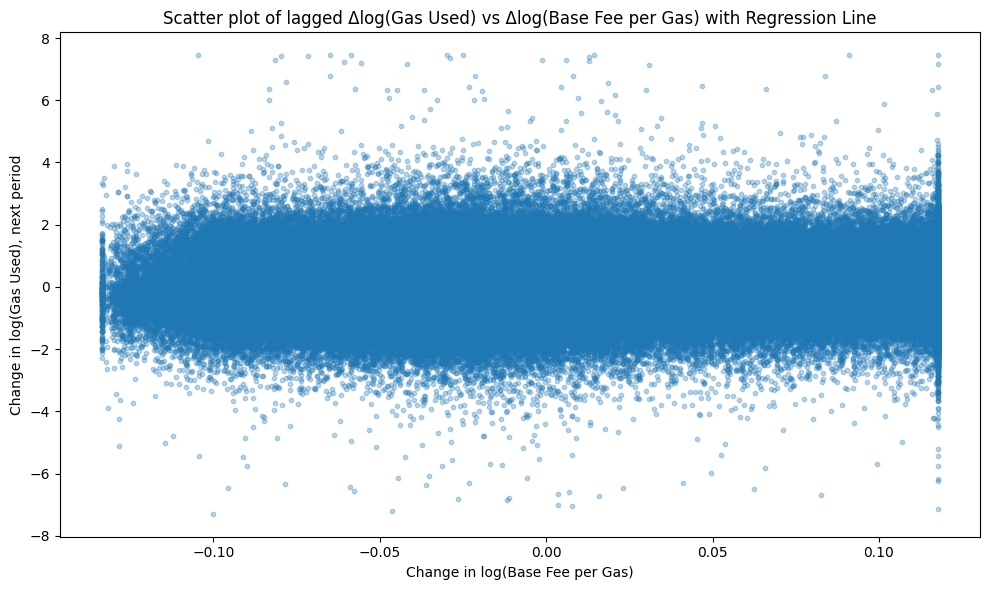

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a lagged version of dlog_gas_used
elasticity_df['dlog_gas_used_lag1'] = elasticity_df['dlog_gas_used'].shift(-2)

# Drop any resulting NaNs
plot_df = elasticity_df.dropna(subset=['dlog_gas_used_lag1', 'dlog_base_fee'])

plt.figure(figsize=(10, 6))
sns.regplot(
    x=plot_df['dlog_base_fee'],
    y=plot_df['dlog_gas_used_lag1'],
    scatter_kws={'alpha':0.3, 's':10},
    line_kws={'color':'red'}
)
plt.xlabel('Change in log(Base Fee per Gas)')
plt.ylabel('Change in log(Gas Used), next period')
plt.title('Scatter plot of lagged Δlog(Gas Used) vs Δlog(Base Fee per Gas) with Regression Line')
plt.tight_layout()
plt.show()



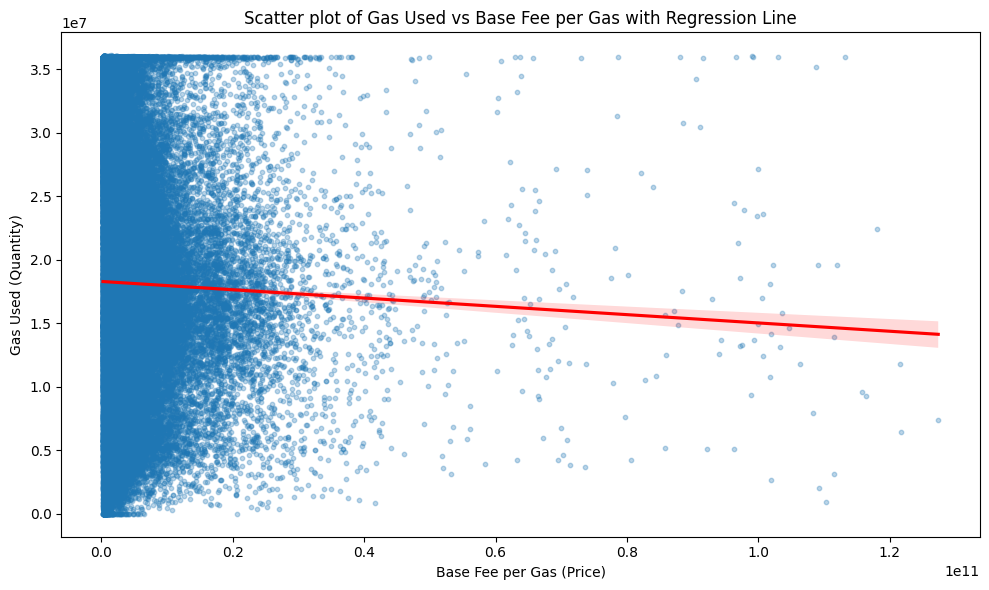

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(
    x=df['base_fee_per_gas'],
    y=df['gas_used'],
    scatter_kws={'alpha':0.3, 's':10},
    line_kws={'color':'red'}
)
plt.xlabel('Base Fee per Gas (Price)')
plt.ylabel('Gas Used (Quantity)')
plt.title('Scatter plot of Gas Used vs Base Fee per Gas with Regression Line')
plt.tight_layout()
plt.show()


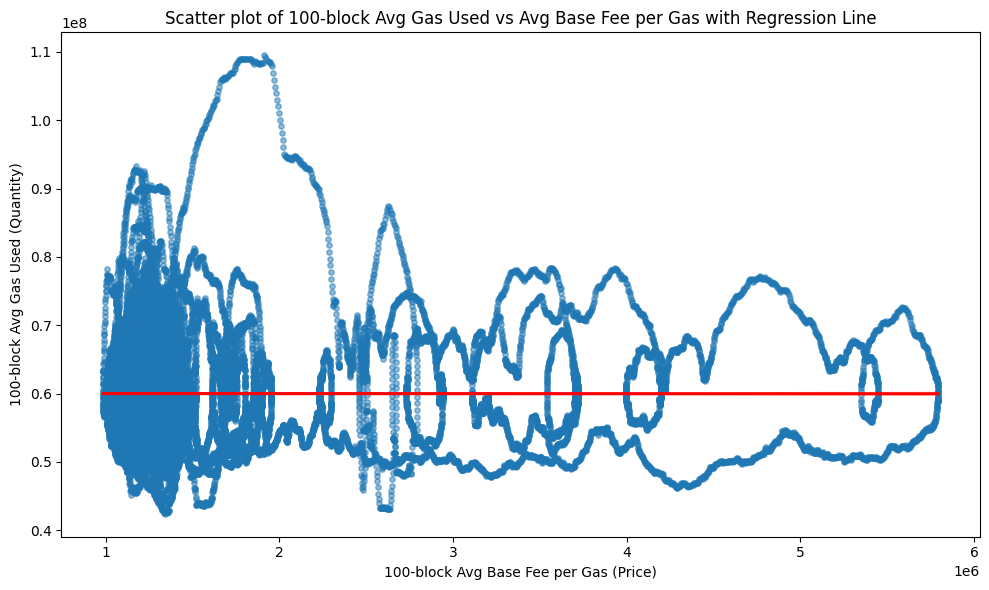

In [95]:
# Compute 100-block rolling average for price and quantity
df_sorted = df.sort_values('number')
df_sorted['avg_gas_used'] = df_sorted['gas_used'].rolling(window=100).mean()
df_sorted['avg_base_fee'] = df_sorted['base_fee_per_gas'].rolling(window=100).mean()

# Drop rows with NaN values from rolling mean
avg_df = df_sorted.dropna(subset=['avg_gas_used', 'avg_base_fee'])

plt.figure(figsize=(10, 6))
sns.regplot(
    x=avg_df['avg_base_fee'],
    y=avg_df['avg_gas_used'],
    scatter_kws={'alpha':0.5, 's':15},
    line_kws={'color':'red'}
)
plt.xlabel('100-block Avg Base Fee per Gas (Price)')
plt.ylabel('100-block Avg Gas Used (Quantity)')
plt.title('Scatter plot of 100-block Avg Gas Used vs Avg Base Fee per Gas with Regression Line')
plt.tight_layout()
plt.show()
